In [18]:
from sympy.abc import alpha

import plots_oct24 as po
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(po)
import pandas as pd
input_folder = '/gladstone/engelhardt/lab/hvu//RNA_rates/elong_rates/pair_end_reads/oct_24/constant/'
input_folder = '/gladstone/engelhardt/lab/hvu//RNA_rates/elong_rates/pair_end_reads/oct_24/constant/'
design_df = po.read_all_result_files(input_folder)

   lambda_init  burst_size  insertsize_min  insertsize_max  read_length  seed  \
0          2.0          15             200             300          100  9999   
1          2.0          15             200             300          100  9999   
2          2.0          15             200             300          100  9999   
3          2.0          15             200             300          100  9999   
4          2.0          15             200             300          100  9999   

   constant_elong_rate length_fold_list  time_traverse_gene  pair_end  ...  \
0                  NaN  (1.0, 1.0, 1.0)                 3.0      True  ...   
1                  NaN  (1.0, 1.0, 1.0)                15.0      True  ...   
2                  NaN  (1.0, 1.0, 1.0)                30.0      True  ...   
3                  NaN  (1.0, 1.0, 1.0)                75.0      True  ...   
4                  NaN  (3.0, 3.0, 3.0)                 3.0      True  ...   

  wMSE_logNormalSolver  wFC_simpleSolver wFC

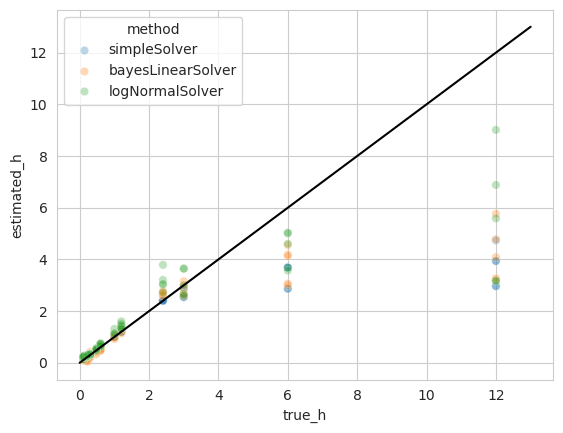

In [16]:
# draw the plot where x-axis: true elongation rate, y-axis: estimated elongation rate
# color of dots: different methods
methods = ['simpleSolver', 'bayesLinearSolver', 'logNormalSolver']
plot_df = design_df[methods + ['true_h']].copy()
plot_df = plot_df.dropna()
# pivot the dataframe to have columns: true_h, method, estimated_h
plot_df = plot_df.melt(id_vars=['true_h'], value_vars=methods, var_name='method', value_name='estimated_h')
fig, ax = plt.subplots()
sns.scatterplot(data=plot_df, x='true_h', y='estimated_h', hue='method', ax=ax, alpha=0.3)
# draw the identity line
x = np.linspace(0, 13, 100)
ax.plot(x, x, color='black')

     trans_per_min                method      wMSE
0             30.0     wMSE_simpleSolver  0.007233
1             30.0     wMSE_simpleSolver  0.030205
2             30.0     wMSE_simpleSolver  0.446493
3             30.0     wMSE_simpleSolver  0.015236
4             30.0     wMSE_simpleSolver  0.009283
..             ...                   ...       ...
217         1800.0  wMSE_logNormalSolver  0.075732
218         1800.0  wMSE_logNormalSolver  2.989529
219         1800.0  wMSE_logNormalSolver  1.387434
220         1800.0  wMSE_logNormalSolver  0.403456
221         1800.0  wMSE_logNormalSolver  0.066594

[222 rows x 3 columns]


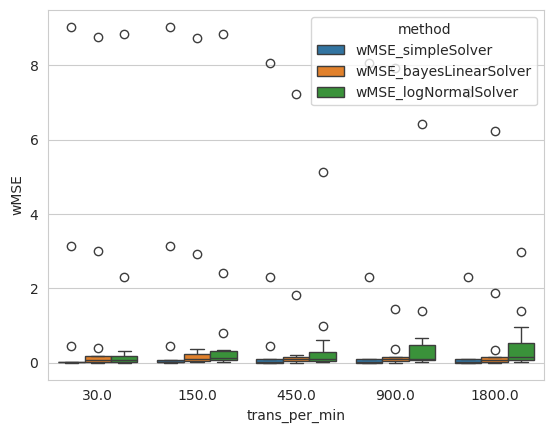

In [27]:
def plot2(design_df, metric = 'wMSE', save_fn=None):
    '''
    Question: Does gene expression affect predictions?
    x-axis: gene expression
    y-axis: wMSE of (pred_h, true_h)
    boxplots
    :param design_df:
    :param save_fn:
    :return:
    '''
    methods = ['simpleSolver', 'bayesLinearSolver', 'logNormalSolver']
    design_df['trans_per_min'] = design_df['lambda_init'] * design_df['burst_size']
    columns_to_plot = [f'{metric}_{method}' for method in methods] + ['trans_per_min']
    # create a melted df with trans_per_min, wMSE, method
    plot_df = design_df[columns_to_plot].copy()
    plot_df = plot_df.melt(id_vars=['trans_per_min'], value_vars=[f'{metric}_{method}' for method in methods], var_name='method', value_name=f'{metric}')
    print(plot_df)
    fig, ax = plt.subplots()
    sns.boxplot(data=plot_df, x='trans_per_min', y=f'{metric}', hue='method', ax=ax)
    return plot_df

plot_df = plot2(design_df)

In [29]:
plot_df[(plot_df['trans_per_min'] ==  30) & (plot_df['method'] == 'wMSE_simpleSolver')]

,trans_per_min,method,wMSE
0,30.0,wMSE_simpleSolver,0.007233
1,30.0,wMSE_simpleSolver,0.030205
2,30.0,wMSE_simpleSolver,0.446493
3,30.0,wMSE_simpleSolver,0.015236
4,30.0,wMSE_simpleSolver,0.009283
5,30.0,wMSE_simpleSolver,0.012886
6,30.0,wMSE_simpleSolver,3.137728
7,30.0,wMSE_simpleSolver,0.016599
8,30.0,wMSE_simpleSolver,0.010702
9,30.0,wMSE_simpleSolver,0.007290


In [35]:
design_df.columns

Index(['lambda_init', 'burst_size', 'insertsize_min', 'insertsize_max',
       'read_length', 'seed', 'length_fold_list', 'time_traverse_gene',
       'pair_end', 'output_folder', 'valid_elong_rate', 'elongf_fn',
       'avg_elong_rate', 'G', 'wMSE_simpleSolver', 'wMSE_bayesLinearSolver',
       'wMSE_bayesRBFSolver', 'wMSE_logNormalSolver', 'wFC_simpleSolver',
       'wFC_bayesLinearSolver', 'wFC_bayesRBFSolver', 'wFC_logNormalSolver',
       'simpleSolver', 'bayesLinearSolver', 'logNormalSolver', 'true_h',
       'trans_per_min'],
      dtype='object')

In [44]:
design_df[(design_df['trans_per_min'] ==  30)][['lambda_init', 'burst_size' , 'wMSE_simpleSolver','length_fold_list', 'time_traverse_gene', 'trans_per_min']]

,lambda_init,burst_size,wMSE_simpleSolver,length_fold_list,time_traverse_gene,trans_per_min
1,2.0,15,0.007233,"(1.0, 1.0, 1.0)",15.0,30.0
2,2.0,15,0.030205,"(1.0, 1.0, 1.0)",30.0,30.0
4,2.0,15,0.446493,"(3.0, 3.0, 3.0)",3.0,30.0
5,2.0,15,0.015236,"(3.0, 3.0, 3.0)",15.0,30.0
6,2.0,15,0.009283,"(3.0, 3.0, 3.0)",30.0,30.0
7,2.0,15,0.012886,"(3.0, 3.0, 3.0)",75.0,30.0
8,2.0,15,3.137728,"(6.0, 6.0, 6.0)",3.0,30.0
9,2.0,15,0.016599,"(6.0, 6.0, 6.0)",15.0,30.0
10,2.0,15,0.010702,"(6.0, 6.0, 6.0)",30.0,30.0
11,2.0,15,0.007290,"(6.0, 6.0, 6.0)",75.0,30.0
